# Day 2 

## Module 4


### Learning Activity - Loading Libraries

We will start once more by loading the required Python libraries.

In [1]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
import warnings

# Module 4
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics.cluster import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Module 5
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

from mpl_toolkits.mplot3d.axes3d import Axes3D 
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

%matplotlib inline
init_notebook_mode()
warnings.simplefilter(action = "ignore")

print("libraries all imported, ready to go")

libraries all imported, ready to go


### Learning Activity: Reading the data

As a first step, we will need to import the data from the "`retail_ml_dataset.csv`" data file that we constructed and exported on Day 1 (or the backup file "`retail_ml_dataset_backup.csv`" that we have provided) into the variable **_X_** using the `read_csv()` function from `pandas` (`pd`). We also want to define the column that we are going to use as the row labels of the DataFrame; in this case, *'CustomerID'*. Once loaded, we can apply once more the `head()` function to preview the first 5 rows of our DataFrame. 

In [3]:
# Import the data from the retail_ml_dataset.csv, set the index column and explore the first few rows

customers_ml_data = pd.read_csv("data/retail_ml_data_backup.csv", index_col='CustomerID')
customers_ml_data.head()

,Austria,Belgium,Finland,France,Germany,Italy,Norway,Portugal,Spain,Switzerland,...,balance,max_spent,mean_spent,min_spent,n_orders,time_between_orders,total_items,total_items_returned,total_refunded,total_spent
CustomerID,,,,,,,,,,,,,,,,,,,,,
12348,0,0,1,0,0,0,0,0,0,0,...,0.383285,1.250693,1.431525,0.513598,-0.134499,-0.866715,2.257327,0.177632,0.250957,0.375547
12350,0,0,0,0,0,0,1,0,0,0,...,-0.555081,-0.636253,-0.573046,0.022799,-0.695840,1.135111,-0.522217,0.177632,0.250957,-0.557665
12352,0,0,0,0,0,0,1,0,0,0,...,-0.148636,0.097227,-0.374642,-0.760775,0.426842,-1.145015,-0.281712,-1.054751,-1.146316,-0.122088
12354,0,0,0,0,0,0,0,0,1,0,...,-0.349333,0.121654,1.005066,2.112152,-0.695840,1.135111,-0.383240,0.177632,0.250957,-0.353048
12356,0,0,0,0,0,0,0,1,0,0,...,1.103279,3.917886,5.490954,3.525167,-0.415170,-0.702314,1.249951,0.177632,0.250957,1.091586


Remember, it is **always** a good practice to check the dimensionality of the imported data using the `shape` command prior to constructing any classification model to make sure you have correctly imported all the data (e.g. one common mistake is to get the separator wrong and end up with only one column). 

In [5]:
# Check the dimensionality of X
print(customers_ml_data.shape)

(3126, 21)


In [6]:
# Filter out the non-binary columns
non_binary_cols = [u'balance', u'max_spent', u'mean_spent',
 u'min_spent', u'n_orders', u'time_between_orders',
 u'total_items', u'total_refunded', u'total_spent']
customers = customers_ml_data[non_binary_cols]
customers.head()


,balance,max_spent,mean_spent,min_spent,n_orders,time_between_orders,total_items,total_refunded,total_spent
CustomerID,,,,,,,,,
12348,0.383285,1.250693,1.431525,0.513598,-0.134499,-0.866715,2.257327,0.250957,0.375547
12350,-0.555081,-0.636253,-0.573046,0.022799,-0.695840,1.135111,-0.522217,0.250957,-0.557665
12352,-0.148636,0.097227,-0.374642,-0.760775,0.426842,-1.145015,-0.281712,-1.146316,-0.122088
12354,-0.349333,0.121654,1.005066,2.112152,-0.695840,1.135111,-0.383240,0.250957,-0.353048
12356,1.103279,3.917886,5.490954,3.525167,-0.415170,-0.702314,1.249951,0.250957,1.091586


In [8]:
# Import the data from the pca_scores.csv, set the index column and explore the first few rows 

pca_scores = pd.read_csv('data/pca_scores_backup.csv', index_col='CustomerID')

pca_scores.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
CustomerID,,,,,,,,,,,,,,,,,,,,,
12348,-2.271389,1.368313,-0.180072,-0.393455,-0.381836,0.705337,1.358346,0.879559,-0.598789,-0.050278,...,0.341694,-0.031846,0.167870,0.002689,-0.098957,0.178167,0.973204,0.079759,-2.621609e-14,6.274434e-16
12350,1.703128,0.117733,-0.181110,0.723449,0.025668,0.027901,0.000094,0.165772,-0.820583,-0.042846,...,0.308174,-0.022790,0.126087,-0.000121,-0.058621,0.079068,0.105597,-1.022737,5.667626e-14,1.748395e-15
12352,-0.469503,-1.823221,-0.328734,-0.973052,-0.289373,-0.087294,-0.132003,0.267063,-0.810250,-0.124060,...,0.308138,-0.024553,0.124233,-0.000675,-0.059919,0.080701,0.102117,-1.020599,-3.889231e-14,-1.674790e-15
12354,0.738601,2.072836,-1.614014,0.131104,0.517500,-0.199777,-0.234890,0.322430,-0.773643,-0.010864,...,0.612729,-0.703141,-0.435451,0.001130,0.065991,-0.047168,-0.030614,0.016054,-7.270035e-14,1.464947e-15
12356,-4.543232,5.282924,-3.153172,-1.421237,-1.259074,0.024170,-0.367150,0.919232,-0.432628,0.409409,...,0.405999,-0.049121,0.544149,-0.704850,0.308078,-0.128072,-0.061955,0.034509,-6.955953e-14,2.037652e-15


## Clustering with K-Means

K-means clustering is a method for finding clusters and cluster centers in a set of unlabeled data. Intuitively, we might think of a cluster as comprising a group of data points whose inter-point distances are small compared with the distances to points outside of the cluster. Given an initial set of K centers, the K-means algorithm alternates the two steps:

1. for each center we identify the subset of training points (its cluster) that is closer to it than any other center;
2. the means of each feature for the data points in each cluster are computed, and this mean vector becomes the new center for that cluster.

These two steps are iterated until the centers no longer move or the assignments no longer change. Then, a new point x can be assigned to the cluster of the closest prototype.

### Learning Activity - Run K-Means with two features
Isolate the features `mean_spent` and `max_spent`, then run the K-Means algorithm on the resulting dataset using K=2 and visualise the result.

In [14]:
# Appy k-means with 2 clusters using a subset of features (mean_spent and max_spent)
kmeans = KMeans(n_clusters = 2)

kmeans.fit(customers[['mean_spent', 'max_spent']])

cluster_assignment = kmeans.predict(customers[['mean_spent','max_spent']])


In [15]:
# This function generates a pairplot enhanced with the result of k-means

def pairplot_cluster(df, cols, cluster_assignment):
    """
    Input
        df, dataframe that contains the data to plot
        cols, columns to consider for the plot as a list
        cluster_assignments, cluster asignment returned by the clustering algorithm
    """
    # seaborn will color the samples according to the column cluster
    df['cluster'] = cluster_assignment 
    sns.pairplot(df, vars=cols, hue='cluster')
    df.drop('cluster', axis=1, inplace=True)

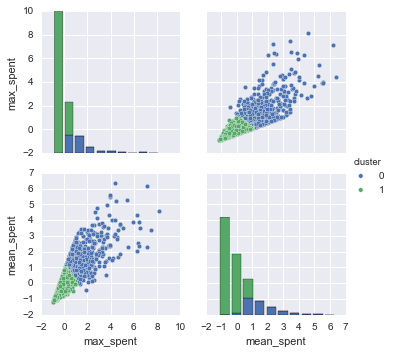

In [24]:
# Visualise the clusters using pairplot_cluster()
pairplot_cluster(customers, ['max_spent','mean_spent'], cluster_assignment)

The separation between the two clusters is neat (the two clusters can be separated with a line). One cluster contains customers with a low spendings and the second with high spendings. 

### Test Activity - Run K-Means with all the features
Run K-Means using all the features available and visualise the result in the subspace `mean_spent` and `max_spent`.

In [20]:
# Appy k-means with 2 clusters using all features
kmeans2 = KMeans(n_clusters = 2)

kmeans2.fit(customers)

cluster_assignment2 = kmeans2.predict(customers)

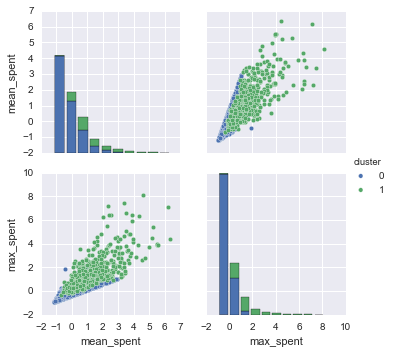

In [27]:
pairplot_cluster(customers, ['mean_spent','max_spent'], cluster_assignment2)

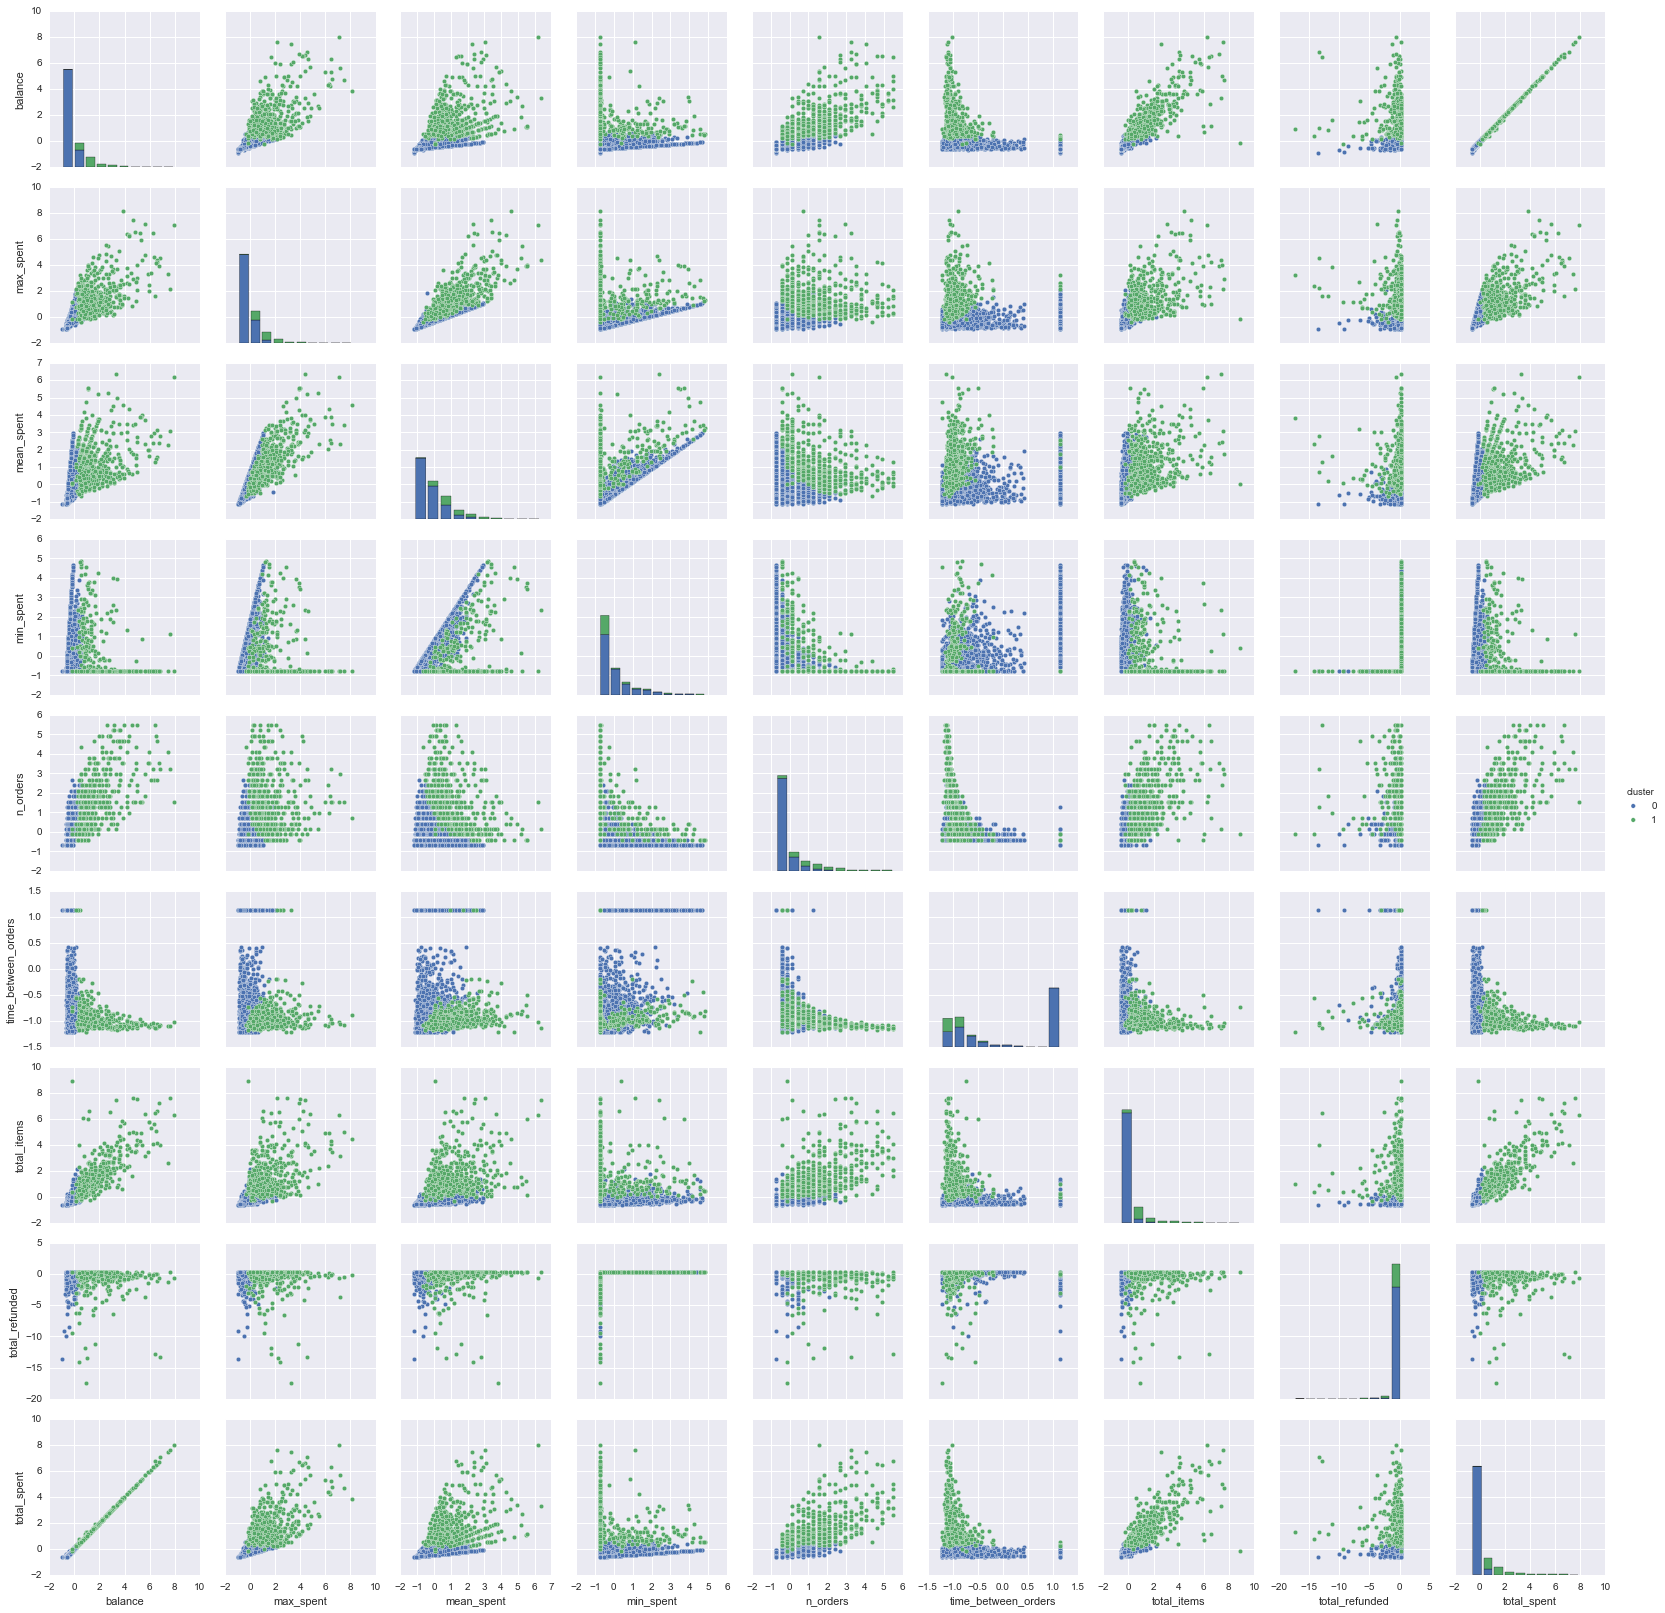

In [25]:
# Visualise the clusters using pairplot_cluster()

pairplot_cluster(customers, customers.columns, cluster_assignment2)

The result is now different. The first cluster contains customers with a maximum spending close to the minimum mean spending and the second contains customers with a maximum spending far from the minimum mean spending. This way can tell apart customers that could be willing to buy object that cost more than their average spending.

***Question***: Why can't the clusters be separated with a line as before?

*** answer! ***: because now we're talking about a 22 dimensional space, and the distinctions are not so clear when you display it on a 2 dimensional graph

### Learning activity - Compare expenditure between clusters

Select the features `'mean_spent'` and `'max_spent'` and compare the two clusters obtained above using them.

In [30]:
# Compare expenditure between clusters

features = ['mean_spent', 'max_spent']

cluster1_df = pd.DataFrame(data= customers[cluster_assignment == 0], 
                          columns= customers.columns)[features]

cluster1_desc = cluster1_df.describe()
cluster1_desc.columns = [c+'_0' for c in cluster1_desc.columns]

cluster2_df = pd.DataFrame(data= customers[cluster_assignment == 1], 
                          columns= customers.columns)[features]

cluster2_desc = cluster2_df.describe()
cluster2_desc.columns = [c+'_1' for c in cluster2_desc.columns]


compare_df = pd.concat((cluster1_desc, cluster2_desc), axis=1)
compare_df

,mean_spent_0,max_spent_0,mean_spent_1,max_spent_1
count,652.000000,652.000000,2474.000000,2474.000000
mean,1.508554,1.460495,-0.397565,-0.384900
std,0.984945,1.227865,0.500561,0.395718
min,-0.441052,0.107925,-1.164888,-0.920492
25%,0.817614,0.668920,-0.822130,-0.706501
50%,1.304789,1.073478,-0.493609,-0.509982
75%,1.924668,1.848213,-0.052067,-0.106201
max,6.362242,8.150460,0.972096,1.034038


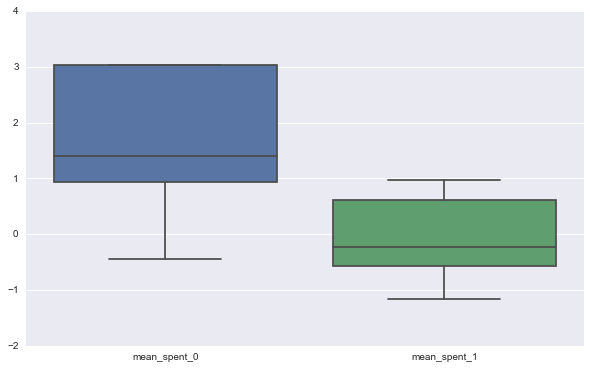

In [31]:
cluster1_df.columns = [c+'_0' for c in cluster1_df.columns]
cluster2_df.columns = [c+'_1' for c in cluster2_df.columns]

plt.figure(figsize=(10,6))
sns.boxplot(data=pd.concat((cluster1_desc['mean_spent_0'], 
                            cluster2_desc['mean_spent_1']),axis=1), 
            showfliers=False)

plt.show()

### Learning Activity - Compare mean expediture with box plot

Compare the distribution of the feature `mean_spent` in the two clusters using a box plot.

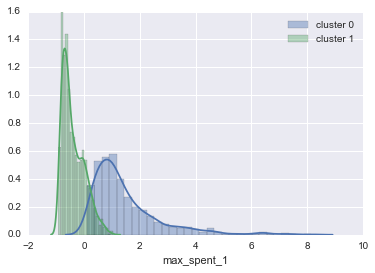

In [34]:
# Compare mean expediture with box plot
sns.distplot(cluster1_df.max_spent_0, label='cluster 0')
sns.distplot(cluster2_df.max_spent_1, label='cluster 1')
plt.legend()

### Learning Activity - Compare the mean expenditure distributions

User the function `distplot` to show the distribution of the mean expen in both clusters.

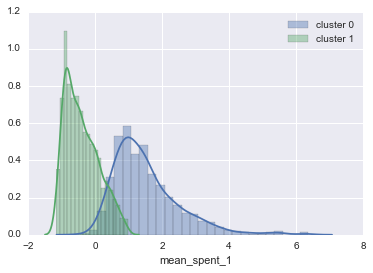

In [35]:
# Compare the mean expenditure distributions
sns.distplot(cluster1_df.mean_spent_0, label='cluster 0')
sns.distplot(cluster2_df.mean_spent_1, label='cluster 1')
plt.legend()

### Test Activity - Looking at the centroids

Look at the centroids of the clusters `kmeans.cluster_centers_` and check the values of the centers in for the features `'mean_spent', 'max_spent'.

In [44]:
# Compare the centroids 

kmeans.cluster_centers_ #for the centroids using only mean and max spent

array([[ 1.51073509,  1.46408601],
       [-0.39659847, -0.38435214]])

In [46]:
kmeans2.cluster_centers_ #for the centroids using all variables

array([[-0.36513474, -0.33216274, -0.26381554,  0.03856585, -0.31956638,
         0.20831592, -0.34746326,  0.11086334, -0.36561785],
       [ 1.65149282,  1.50236152,  1.19322931, -0.17443212,  1.44538856,
        -0.94220626,  1.57156529, -0.50143135,  1.65367789]])

Here we note:
- Cluster 0 contains more customers.
- Customers in cluster 1 spend more in average, but have a more changeble behaviour.
- Customers in cluster 1 place more order and ask for more refunds.

We can study the averages also looking at the centroids:

***K-Means, pro and cons***

Pro
- fast, if your dataset is big K-Means might be the only option
- easy to understand
- any unseen point can be assigned to the claster with the closest mean to the point
- many implementsions available

Cons
- you need to guess the number of clusters
- custers can be only globular
- the results depends on the initial choice of the means
- all the points are assigned to a cluster, clusters are affected by noise

### Learning Activity - Compute the silhouette score
Compute the silhouette score of the clusters resuting from the application of K-Means.

The Silhouette Coefficient is calculated using the mean intra-cluster distance (``a``) and the mean nearest-cluster distance (``b``) for each sample.  The Silhouette Coefficient for a sample is ``(b - a) / max(a, b)``. It represents how similar a sample is to the samples in its own cluster compared to samples in other clusters.

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [47]:
# Compute the silhouette score
print('sillhouette_score', silhouette_score(customers, cluster_assignment))

('sillhouette_score', 0.44159242844909224)


The silhouette score is pretty high, we can say that the clusters are compact.

### Test Activity - Run KMeans on the dataset obtained with PCA

Compute KMeans on the dataset `XScores` usgin the first 2 principal components.

Visualize the results using again the function `pairplot_cluster` in the first 4 principal components.

('silhouette_score', 0.51052615257372902)


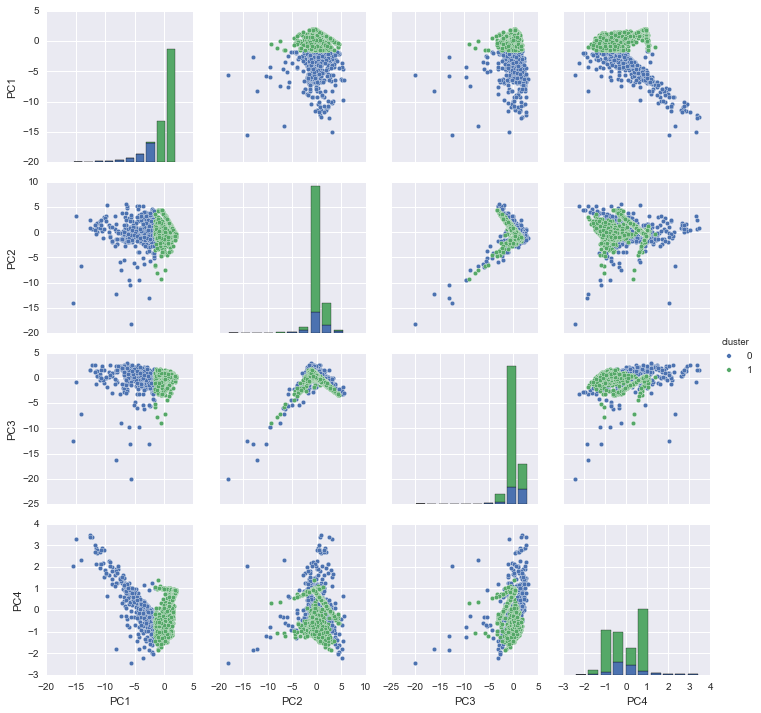

In [52]:
# Run KMeans on the first two principal components
XScores = pca_scores

print('silhouette_score', silhouette_score(customers, cluster_assignment))
kmeans3 = KMeans(n_clusters = 2)
kmeans3.fit(XScores[['PC1', 'PC2', 'PC3']]) #only using the three PC features for the clustering
cluster_assignment = kmeans3.predict(XScores[['PC1', 'PC2', 'PC3']])
pairplot_cluster(XScores, ['PC1', 'PC2', 'PC3', 'PC4'], cluster_assignment)


## Hierarchical clustering: Linking with Linkage

The main idea behind hierarchical clustering is that you start with each point in it's own cluster and then

1. compute distances between all clusters
2. merge the closet clusters

Do this repeatedly until you have only one cluster.

This algorithm groups the samples in a bottom-up fashion and falls under the category of the agglomerative clustering algorithms.

According to the distance between clusters and samples that one choose the clusters will have different properties. In this section we'll use a distance that will minimizes the variance of the clusters being merged.

This algorithm results in a hierarchy, or binary tree, of clusters branching down to the last layer which has a leaf for each point in the dataset that can be visualise with a "Dendrogram". The advantage of this approach is that clusters can grow according to the shape of the data rather than being globular.

sklearn implements hierarchical clustering in the class `sklearn.cluster.AgglomerativeClustering` (http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering), this class is mainly a wrapper to the functions in `scipy.cluster.hierarchy` (http://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html).

### Learning Activity - Plotting dendograms
Use the function `linkage()` from `scipy.cluster.hierarchy` to cluster the retail data and pass the result to the function `dendrogram()` to visualise the result. Trunc the dendrogram if the initial result is unreadable.

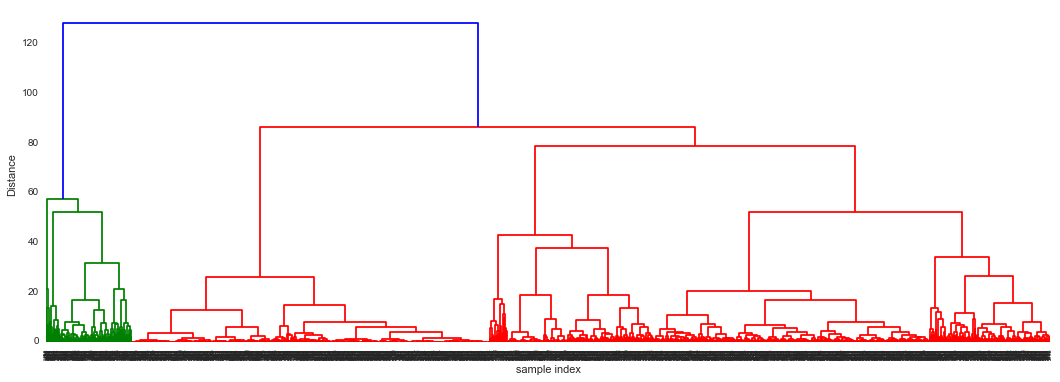

In [54]:
# Apply hierarchical clustering 
Z = linkage(customers, method='ward', metric= 'euclidean')

# Draw the dendrogram
plt.figure(figsize=(18,6))
dendrogram(Z)
plt.ylabel('Distance')
plt.xlabel('sample index')
plt.show()

The coloring of the figure highlights that the data can be segmented in two big clusters that were merged only in the very last iterations of the algorithm. But, if we look close, we can spot another smaller cluster that was merged to the red one at a distance of around 40.

We can improve the readability of the dendrogram showing only the last merged clusters and a threshold to color the clusters:

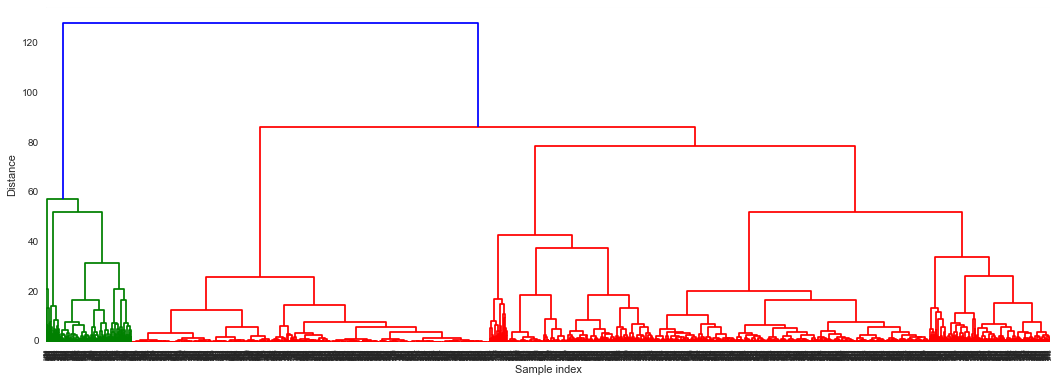

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe2 in position 0: ordinal not in range(128)

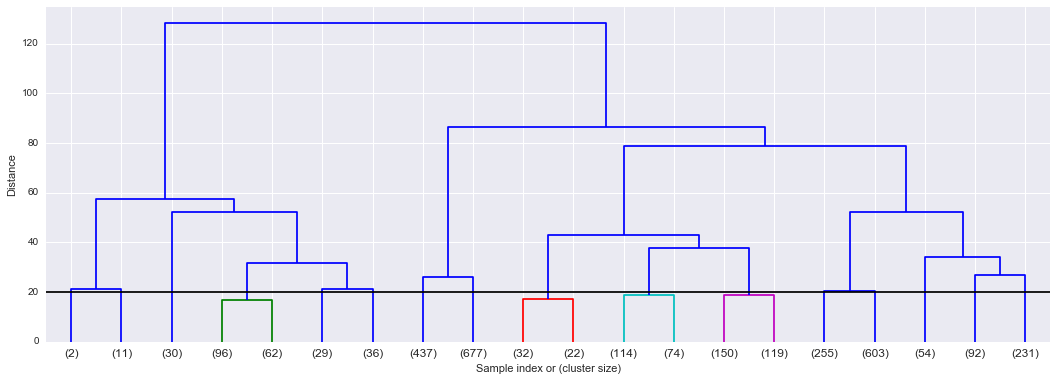

In [57]:
# Draw the dendrogram using a cut_off value
Z = linkage(customers, method='ward', metric='euclidean')
plt.figure(figsize=(18,6))
dendrogram(Z)
plt.ylabel('Distance')
plt.xlabel('Sample index')
plt.show()
plt.figure(figsize=(18,6))
cut_off = 20
dendrogram(Z, color_threshold=cut_off,
 truncate_mode='lastp', # show only the last p merged clusters
 p=20)
plt.ylabel('Distance')
plt.xlabel('Sample index or (cluster size)')
plt.hlines(cut_off, 0, len(customers), linestyle='‐‐')
plt.show()

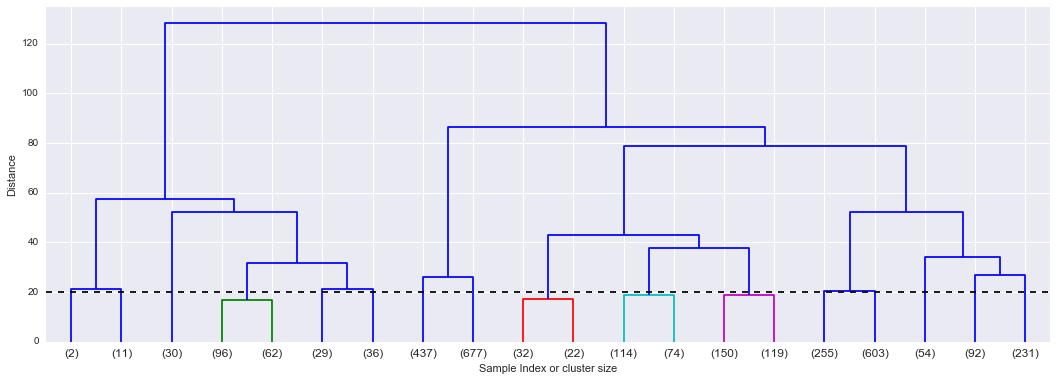

In [67]:
# dedrogram version from class

plt.figure(figsize=(18,6))
cut_off= 20
dendrogram(Z, color_threshold=cut_off,
          truncate_mode='lastp',
          p=20)

plt.ylabel('Distance')
plt.xlabel('Sample Index or cluster size')
plt.hlines(cut_off, 0, len(customers), linestyle='--')
plt.show()

This time we able to see the threshold that reflects the color to the clusters and we easily realise that the closer it is to zero, the more clusters are highlighted.

### Learning Activity - Running Linkage with Sklearn

Use `sklearn.cluster.AgglomerativeClustering` to cluster the retail data according to the 3 clusters highlighted by the dendrogram above and visualise the result in the subspace give by the features `mean_spent` and `max_spent`.

In [68]:
# Perform clustering with AgglomerativeClustering
n_cluster = 3
agglomerative = AgglomerativeClustering(n_clusters=n_cluster,
                                       linkage='ward', #merges two clusters if the resulting has small variance
                                       affinity='euclidean')

cluster_assignment = agglomerative.fit_predict(customers)

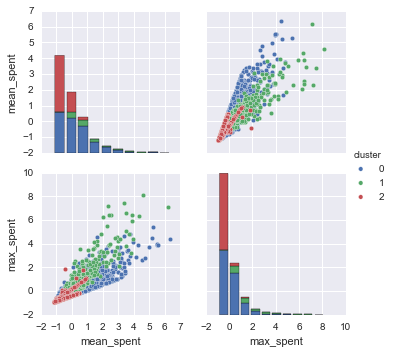

In [69]:
# Visualise the clusters using pairplot_cluster()
pairplot_cluster(customers, ['mean_spent','max_spent'], cluster_assignment)

The result is similar to the one we had with K-Means, but now we also tell apart customers that moderately deviate from their average with their maximum spenging and customer that strongly deviate.

### Learning Activity - Visualising the clusters in 3D
Create a 3D chart where the results of the Linkage algorithm is shown in the space formed by the features `min_spent`, `max_spent` and `mean_spent`.

In [70]:
# This function generates a 3D plot enhanced with the result of clustering

def scatter_cluster3d(x, y, z, cluster_assignment, fig):
    ax = Axes3D(fig)
    for cluster in np.unique(cluster_assignment):
        ax.scatter(x[cluster_assignment==cluster], 
                   y[cluster_assignment==cluster], 
                   z[cluster_assignment==cluster],
                   c=sns.color_palette()[cluster], label='cluster '+str(cluster))
    return ax

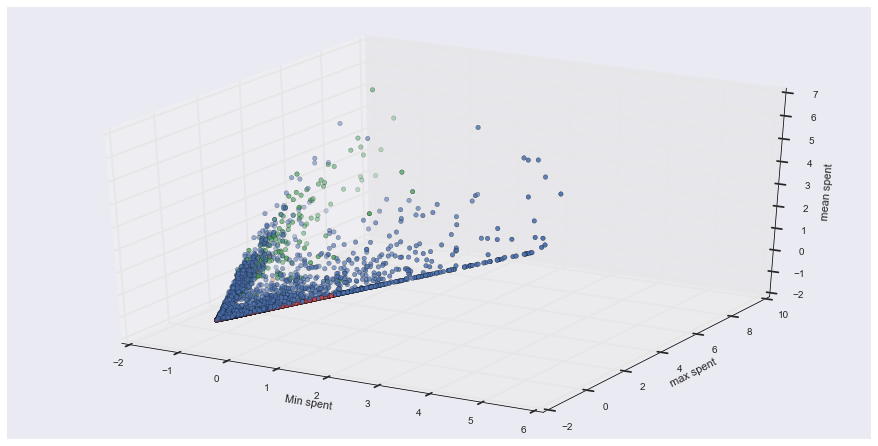

In [71]:
# Visualise the clusters in 3D using the scatter_cluster3d() function

fig = plt.figure(figsize=(12, 6))
ax = scatter_cluster3d(customers['min_spent'],customers['max_spent'],
                      customers['mean_spent'], cluster_assignment, fig)

ax.set_xlabel('Min spent')
ax.set_ylabel('max spent')
ax.set_zlabel('mean spent')

plt.show()

In this space we can see that cluster 1 has less variablity respect to cluster 0.

### Bonus Activty - Interactive 3D visualisation with Plotly

Recreate the 3D plot above with Plotly.

Here are some example to inspire your code: https://plot.ly/python/3d-scatter-plots/

In [99]:
# Create an interactive 3D plot enhanced with the result of clustering

data = []

for cluster in range(n_cluster):
    trace = Scatter3d(x = customers['min_spent'][cluster_assignment==cluster],
                     y = customers['max_spent'][cluster_assignment==cluster],
                     z = customers['mean_spent'][cluster_assignment==cluster],
                     mode = 'markers',
                     marker = dict(opacity=0.5, size=2.5),
                     name='cluster '+str(cluster))
    data.append(trace)
    
ayout = Layout(
    scene = Scene(xaxis=XAxis(title='min_spent'),
                 yaxis=YAxis(title='max spent'),
                 zaxis=ZAxis(title='mean_spent')
                 )
    )

fig = dict(data= data, layout = ayout)
# iplot(fig)

You can navigate this chart with you mouse and hide/show the cluster clicking on the legend.

***Hierarchical clustering, pro and cons***

Pros
- The clusters are not globulars anymore
- Doesn't depend on initial random choices
- The dendrogram shows a good summary of how the algorithm works

Cons
- Slower than K-Means
- We still need to choose the number of clusters
- Still, the clusters are affected by noisy points
- Assigning a new point to a cluster is not straightforward

## DBSCAN

The DBSCAN algorithm views clusters as areas of high density separated by areas of low density. Due to this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped. The central component to the DBSCAN is the concept of core samples, which are samples that are in areas of high density. A cluster is therefore a set of core samples, each close to each other (measured by some distance measure) and a set of non-core samples that are close to a core sample (but are not themselves core samples). There are two parameters to the algorithm, min_samples and eps, which define formally what we mean when we say dense. Higher min_samples or lower eps indicate higher density necessary to form a cluster. 

Summary of the Algorithm:

- starts with an arbitrary starting point and retrieved all the points in the radius of distance `eps` from it 
    - if the radius contains `min_samples` points, start a cluster
      - add all the points in the radius of distance `eps` to the cluster and their `eps` neighbors.
      - continue expanding the cluster iterating on the the procedure on all the neighbors
    - otherwise mark it as noise/outlier




Sklearn implementation doc: http://scikit-learn.org/stable/modules/clustering.html#dbscan

Animated DBSCAN: http://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

## Learning Activity - A starting value for eps

Measure the distance of each point to its closest neighbor using the function `sklearn.metrics.pairwise.pairwise_distances` (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.pairwise_distances.html) and plot the distribution of the distances.

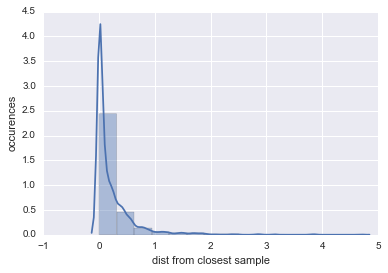

In [100]:
# Calculate the distance of each point to its closest neighbor

all_distances = pairwise_distances(customers, metric='euclidean')
neig_distances = [np.min(row[np.nonzero(row)])for row in all_distances]

# Plot the distances
sns.distplot(neig_distances, bins=15)
plt.xlabel('dist from closest sample')
plt.ylabel('occurences')
plt.show()




The distribution of the distance will help us choose a starting point for `eps`. We see that it's very likely that a point as at least one neighbour in a radius of 0.15 and that only very few point have it at distance 2.5. Since we want that a core point has more than one point in is `eps`-neighborhood we can start picking `eps` on the right tail of the distribution.

## Learning Activity - Applying DBSCAN

Cluster the customer data with DBSCAN and visualise the results in the subspaces used for the other algorithms.

In [101]:
# Apply DBSCAN
db = DBSCAN(eps=1.5, min_samples=8)
cluster_assignment = (db.fit_predict(customers))

clusters_found = np.unique(cluster_assignment)
print("Clusters found " + str(len(clusters_found)))

Clusters found 2


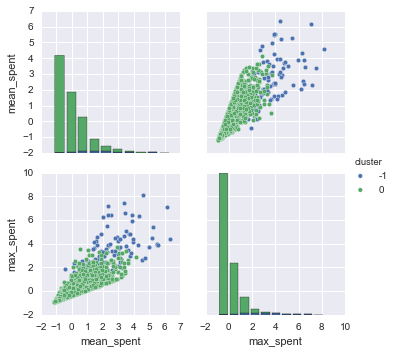

In [102]:
# Visualise the clusters using pairplot_cluster()

pairplot_cluster(customers,['mean_spent','max_spent'], cluster_assignment)


DBSCAN clustered all the points in one big cluster and marked as outiers all the points that are not in dense areas.

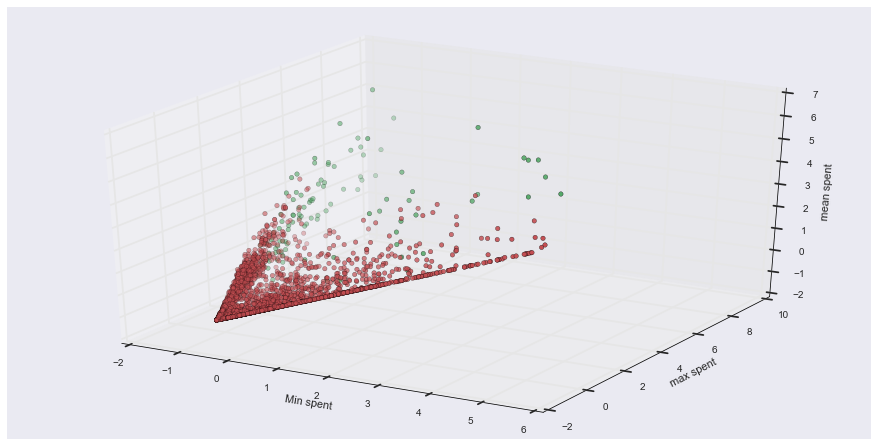

In [103]:
# Visualise the clusters in 3D using the scatter_cluster3d() function

fig = plt.figure(figsize=(12, 6))
ax = scatter_cluster3d(customers['min_spent'],customers['max_spent'],
                      customers['mean_spent'], cluster_assignment+2, fig)

# why plus 2 on cluster_assignment??
# 

ax.set_xlabel('Min spent')
ax.set_ylabel('max spent')
ax.set_zlabel('mean spent')

plt.show()


Here we see that DBSCAN grouped most of the samples in 1 big cluster and maked samples at the border of this space as outliers. Which means that DBSCAN acted as an outlier detection algorithm more than a clustering algorithm.

### Test Activity - Run DBSCAN on the dataset obtained with PCA

Run DBSCAN on the first 3 principal components in `Xscores`.

Tweak the parameters to achieve about 5 clusters as result.

In [104]:
# Run DBSCAN on the first 3 principal components
db = DBSCAN(eps=0.9, min_samples=5)
cluster_assignment = db.fit_predict(XScores[0:3])



### Learning activity - Compute the silhouette score of the DBSCAN cluster

Compute the silhouette score of the clusters made with DBSCAN and compare it with the silhouette score achieved with K-Means.

In [ ]:
# Compute the silhouette score of DBSCAN

### Learning Activity -  How many clusters with DBSCAN?

Vary `eps` and `min_samples` and study how the number of clusters varies as result. This way we'll have an idea of how many cluster we get varying the parameters. This can help us choose the parameters if we already have an idea of how many clusters we want to create.

In [98]:
# WARNING this may take a couple of minutes to finish!
eps = np.linspace(.5, 2.0, 20)
mins = np.arange(10, 50, 5)
Z = np.zeros((len(eps), len(mins)))

for i, e in enumerate(eps):
    for j, m in enumerate(mins):
        db = DBSCAN(eps=e, min_samples=m)
        clusters_found = len(np.unique(db.fit_predict(customers)))
        Z[i,j] = clusters_found

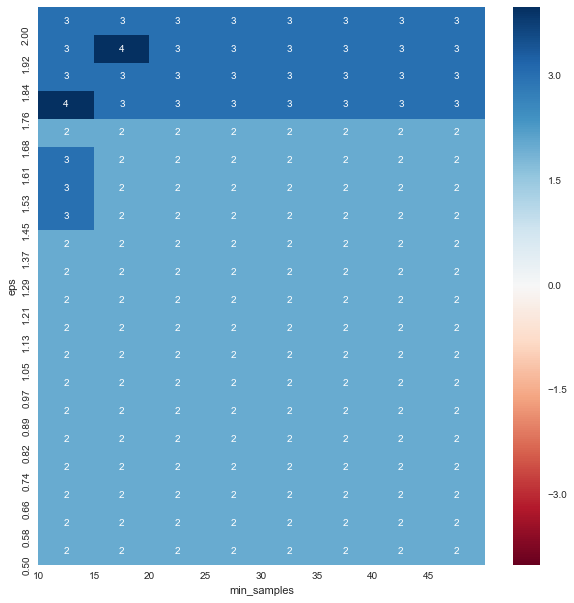

In [105]:
# Plot in a heatmap 
plt.figure(figsize=(10,10))
sns.heatmap(Z, cmap='RdBu', center=0, annot=True)
plt.xticks(np.arange(Z.shape[1]), mins)
plt.xlabel('min_samples')
plt.yticks(np.arange(Z.shape[0]), ['%0.2f' % x for x in eps])
plt.ylabel('eps')
plt.show()

***DBSCAN, pro and cons***

Pros
- The clusters are not globulars anymore
- We don't have to chose the number of clusters
- Fast, few clustering algorithms can tackle datasets as large as DBSCAN can.
- Has an embedded concept of noise (outliers)

Cons
- `eps` and `min_samples` can be hard to tune
- less intuitive than K-Means or Linkage
- assigning an unseen sample to a cluster is not straightforward

## Module 5

This module will focus on introducing, building and optimising a classification model, the K Nearest Neighbor (KNN) classifier. The principle behind KNN is very simple. Given a dataset where you know the class labels, when a new point is introduced, you want to find a particular number of points in the data closest in distance to the new point. These are called the “nearest neighbours”.  You then use the labels associated with these nearest neighbour points (which may or may not be different from each other) to predict the label of the new point using a majority vote.

### Learning Activity: Convert DataFrames to numpy arrays

In order to feed the data into our classification models in scikit-learn, the imported DataFrames need to be converted into `numpy` arrays. For more information on numpy arrays, read the documentation at http://scipy-lectures.github.io/intro/numpy/array_object.html. 

In [7]:
#need to reload the data because it's missing the classes. But they are indexed on CustomerID
customers_ml_data = pd.read_csv("data/retail_ml_data_backup.csv", index_col='CustomerID')
classes = pd.read_csv("data/customer_classes.csv", index_col='CustomerID')

customers_ml_data = customers_ml_data.join(classes)

customers_ml_data['class'].head()

CustomerID
12348    yes
12350     no
12352    yes
12354     no
12356    yes
Name: class, dtype: object

In [9]:
# Convert to numpy array and check the dimensionality


customers_ml_data = np.array(customers_ml_data)
x = customers_ml_data[:,:-1].astype(float)
y = customers_ml_data[:,-1]

print ("X dimensions: ", x.shape)
print ("y dimensions: ", y.shape)

('X dimensions: ', (3126, 21))
('y dimensions: ', (3126,))


### Learning Activity - Investigate the y frequencies

An important aspect to understand before applying any classification algorithm is how the output labels are distributed. Are they evenly distributed or not? Imbalances in distribution of labels can often lead to poor classification results for the minority class even if the classification results for the majority class are very good.

In [6]:
# Calculate and print the y frequencies
yfreq = scipy.stats.itemfreq(y)
yfreq = pd.DataFrame(yfreq, columns=['class','freq'])
print(yfreq)

  class  freq
0    no  1388
1   yes  1738


Visualising the class frequencies is a good way to get a feel for how the data is distributed. As a simple example, try plotting the frequencies of the class labels (held in yFreq), "yes" and "no", and see how they are distributed using a barplot from seaborn:

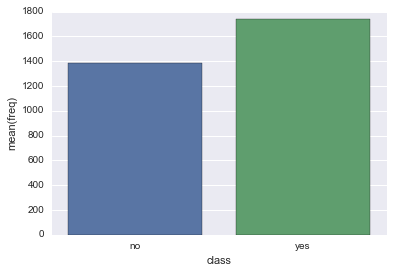

In [10]:
# Display the y frequencies in a barplot

ax = sns.barplot(x='class', y='freq', data=yfreq)
plt.show()

### Learning Activity: Encode categorical values

In our current dataset, you can see that the y values are categorical (i.e. they only take one of a discrete set of values) and have a non-numeric representation, "yes" vs. "no". This can be problematic for scikit-learn and plotting functions in Python, since they assume numerical values, so we need to map the text categories to numerical representations using LabelEncoder() and the fit_transform() function from the preprocessing module:

In [11]:
# Convert the categorical values into numbers using the label encoder


# Initialise a LabelEncoder object
le = LabelEncoder()

# Fit label encoder, return encoded labels and assign back to the class column of y
y = le.fit_transform(y)

In [12]:
# Calculate and print the y frequencies
yfreq = scipy.stats.itemfreq(y)
yfreq = pd.DataFrame(yfreq, columns=['class','freq'])
print(yfreq)

   class  freq
0      0  1388
1      1  1738


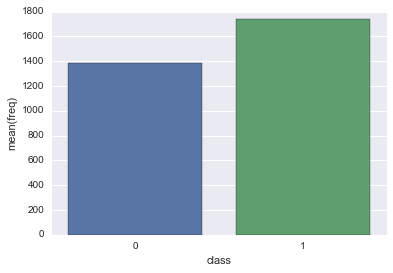

In [13]:
ax = sns.barplot(x='class', y='freq', data=yfreq)
plt.show()

We can observe that the categorical values have been mapped to numeric values based on their alphabetic order ('no' to 0 and 'yes' to 1). More information on LabelEncoder(), its parameters and how to use it can be found at http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

### Learning Activity - Split the data into training and test sets (raw data prior to PCA)

Training and testing a classification model on the same dataset is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data (poor generalisation). To use different datasets for training and testing, we need to split the wine dataset into two disjoint sets: train and test (**Holdout method**) using the `train_test_split` function. <br/> 

In [15]:
# Split the raw data into training and test sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=1)

# Print the dimensionality of the individual splits
print ("XTrain dimensions: ", xtrain.shape)
print ("yTrain dimensions: ", ytrain.shape)
print ("XTest dimensions: ", xtest.shape)
print ("yTest dimensions: ", ytest.shape)

('XTrain dimensions: ', (2344, 21))
('yTrain dimensions: ', (2344,))
('XTest dimensions: ', (782, 21))
('yTest dimensions: ', (782,))


### Learning Activity - Train, optimise and test a KNN algorithm with scikit-learn

To build KNN models using scikit-learn, you will be using the `KNeighborsClassifier` object, which allows you to set the value of K using the `n_neighbors` parameter (http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). For every classification model built with scikit-learn, we will follow four main steps: 
1) **Building** the classification model (using either default, pre-defined or optimised parameters), 
2) **Training** the model, 
3) **Testing** the model, and 
4) **Performance evaluation** using various metrics. <br/> <br/>

The optimal choice for the value K is highly data-dependent: in general a larger K suppresses the effects of noise, but makes the classification boundaries less distinct. Rather than trying one-by-one predefined values of K, we can automate this process. The scikit-learn library provides the grid search function `GridSearchCV` (http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html), which allows us to exhaustively search for the optimum combination of parameters by evaluating models trained with a particular algorithm with all provided parameter combinations. Further details and examples on grid search with scikit-learn can be found at http://scikit-learn.org/stable/modules/grid_search.html. You can use the `GridSearchCV` function with the validation technique of your choice (in this example, 10-fold cross-validation has been applied) to search for a parametisation of the KNN algorithm that gives a more optimal model:

In [18]:
# Grid search with 10-fold cross-validation using a dictionary of parameters
n_neighbors = np.arange(1,101,2)
parameters = [{'n_neighbors': n_neighbors}]

# Create the dictionary of given parameters
gridCV = GridSearchCV(KNeighborsClassifier(), parameters, cv=10, n_jobs=4)
gridCV.fit(xtrain, ytrain)
# Optimise and build the model with GridSearchCV
bestNeighbors = gridCV.best_params_['n_neighbors']

# Report the optimal parameters
print("the best param are: ",bestNeighbors)

('the best param are: ', 31)


When evaluating the resulting model it is important to do it on held-out samples that were not seen during the grid search process (XTest). <Br/>
So, we are testing our independent XTest dataset using the optimised model:

In [25]:
# Build the classifier using the optimal parameters detected by grid search
knn = KNeighborsClassifier(n_neighbors= bestNeighbors)

# Fit to the training set 
knn.fit(xtrain,ytrain)

# Predict the test data
predicted = knn.predict(xtest)

# knn.score(xtest,ytest) # can be used too

accuracy_score = metrics.accuracy_score(ytest,predicted)

# Report the final overall accuracy
print (accuracy_score)

0.858056265985


### Test Activity - Split the PCA scores and class labels into training and test sets


At this stage, we want to repeat the whole model-building process, starting by applying holdout like before, but this time apply it to the data generated by PCA (PCA scores) and their associated class labels. As before, you need to use the `train_test_split()` function, and remember to keep the same seed (`random_state=1`) for direct and fair comparison! You may need to select the number of PCs from your Xscores that you will feed into your model, or create a for loop to try and test different values. 

In [26]:
# Split the results of PC scores into training and test sets
# restart from here: http://localhost:8888/notebooks/notebooks/day2.ipynb#Learning-Activity:-Convert-DataFrames-to-numpy-arrays

# Print the dimensionality of the individual splits

### Learning Activity - Train, optimise and test a KNN algorithm with scikit-learn

Repeat the process of training and optimising a KNN classifier as before, but this time, apply it to your newly created train and test data (after PCA). 

In [ ]:
# Grid search with 10-fold cross-validation using a dictionary of parameters

# Create the dictionary of given parameters

# Optimise and build the model with GridSearchCV

# Report the optimal parameters

In [ ]:
# Build the classifier using the optimal parameters detected by grid search

### END OF DAY 2 